# Predicting House Prices

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
from scipy.stats.mstats import winsorize
from sqlalchemy import create_engine
import warnings
from sklearn import linear_model
import statsmodels.api as sm

warnings.filterwarnings('ignore')
sns.set(style="whitegrid")

postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'houseprices'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

df = pd.read_sql_query('select * from houseprices',con=engine)

# no need for an open connection, 
# as we're only doing a single query
engine.dispose()

In [3]:
df.head()

,id,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,utilities,...,poolarea,poolqc,fence,miscfeature,miscval,mosold,yrsold,saletype,salecondition,saleprice
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,12,2008,WD,Normal,250000


In [4]:
# dataframe.size 
size = df.size 
  
# dataframe.shape 
shape = df.shape 
  
# dataframe.ndim 
df_ndim = df.ndim 
  
# series.ndim 
series_ndim = df["saleprice"].ndim 
  
# printing size and shape 
print("Size = {}\nShape ={}\nShape[0] x Shape[1] = {}". 
format(size, shape, shape[0]*shape[1])) 
  
# printing ndim 
print("ndim of dataframe = {}\nndim of series ={}". 
format(df_ndim, series_ndim)) 

Size = 118260
Shape =(1460, 81)
Shape[0] x Shape[1] = 118260
ndim of dataframe = 2
ndim of series =1


## Investigate the data, and do any necessary data cleaning.

In [5]:
#df.info()
df.describe(include='all')

,id,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,utilities,...,poolarea,poolqc,fence,miscfeature,miscval,mosold,yrsold,saletype,salecondition,saleprice
count,1460.000000,1460.000000,1460,1201.000000,1460.000000,1460,91,1460,1460,1460,...,1460.000000,7,281,54,1460.000000,1460.000000,1460.000000,1460,1460,1460.000000
unique,NaN,NaN,5,NaN,NaN,2,2,4,4,2,...,NaN,3,4,4,NaN,NaN,NaN,9,6,NaN
top,NaN,NaN,RL,NaN,NaN,Pave,Grvl,Reg,Lvl,AllPub,...,NaN,Gd,MnPrv,Shed,NaN,NaN,NaN,WD,Normal,NaN
freq,NaN,NaN,1151,NaN,NaN,1454,50,925,1311,1459,...,NaN,3,157,49,NaN,NaN,NaN,1267,1198,NaN
mean,730.500000,56.897260,NaN,70.049958,10516.828082,NaN,NaN,NaN,NaN,NaN,...,2.758904,NaN,NaN,NaN,43.489041,6.321918,2007.815753,NaN,NaN,180921.195890
std,421.610009,42.300571,NaN,24.284752,9981.264932,NaN,NaN,NaN,NaN,NaN,...,40.177307,NaN,NaN,NaN,496.123024,2.703626,1.328095,NaN,NaN,79442.502883
min,1.000000,20.000000,NaN,21.000000,1300.000000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,1.000000,2006.000000,NaN,NaN,34900.000000
25%,365.750000,20.000000,NaN,59.000000,7553.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,5.000000,2007.000000,NaN,NaN,129975.000000
50%,730.500000,50.000000,NaN,69.000000,9478.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,6.000000,2008.000000,NaN,NaN,163000.000000
75%,1095.250000,70.000000,NaN,80.000000,11601.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,8.000000,2009.000000,NaN,NaN,214000.000000


In [6]:
# Discover Non-numeric variables

non_numeric_columns = df.select_dtypes(['object']).columns
print(non_numeric_columns)
print("The number of non-numerical columns is {}".format(len(non_numeric_columns)))

Index(['mszoning', 'street', 'alley', 'lotshape', 'landcontour', 'utilities',
       'lotconfig', 'landslope', 'neighborhood', 'condition1', 'condition2',
       'bldgtype', 'housestyle', 'roofstyle', 'roofmatl', 'exterior1st',
       'exterior2nd', 'masvnrtype', 'exterqual', 'extercond', 'foundation',
       'bsmtqual', 'bsmtcond', 'bsmtexposure', 'bsmtfintype1', 'bsmtfintype2',
       'heating', 'heatingqc', 'centralair', 'electrical', 'kitchenqual',
       'functional', 'fireplacequ', 'garagetype', 'garagefinish', 'garagequal',
       'garagecond', 'paveddrive', 'poolqc', 'fence', 'miscfeature',
       'saletype', 'salecondition'],
      dtype='object')
The number of non-numerical columns is 43


In [7]:
# Discover Numeric variables

numeric_columns = df.select_dtypes(['int64', 'float64']).columns
print(numeric_columns)
print("The number of numerical columns is {}".format(len(numeric_columns)))

Index(['id', 'mssubclass', 'lotfrontage', 'lotarea', 'overallqual',
       'overallcond', 'yearbuilt', 'yearremodadd', 'masvnrarea', 'bsmtfinsf1',
       'bsmtfinsf2', 'bsmtunfsf', 'totalbsmtsf', 'firstflrsf', 'secondflrsf',
       'lowqualfinsf', 'grlivarea', 'bsmtfullbath', 'bsmthalfbath', 'fullbath',
       'halfbath', 'bedroomabvgr', 'kitchenabvgr', 'totrmsabvgrd',
       'fireplaces', 'garageyrblt', 'garagecars', 'garagearea', 'wooddecksf',
       'openporchsf', 'enclosedporch', 'threessnporch', 'screenporch',
       'poolarea', 'miscval', 'mosold', 'yrsold', 'saleprice'],
      dtype='object')
The number of numerical columns is 38


## Is there missing data?

In [8]:
total_missing = df.isnull().sum().sort_values(ascending=False)
percent_missing = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total_missing, percent_missing], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
poolqc,1453,0.995205
miscfeature,1406,0.963014
alley,1369,0.937671
fence,1179,0.807534
fireplacequ,690,0.472603
lotfrontage,259,0.177397
garagecond,81,0.055479
garagetype,81,0.055479
garageyrblt,81,0.055479
garagefinish,81,0.055479


I didn't do any data cleaning due to the fact that the variables I wanted to use weren't NULL or missing.

If I wanted to clean the data, I would've used interpolation.

And to help with outliers, I would use winsorization.

## Explore the data and find some variables that  would be useful in predicting house prices.

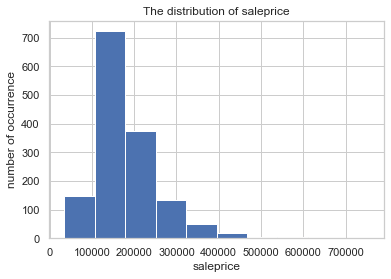

In [9]:
plt.hist(df.saleprice)
plt.title("The distribution of saleprice")
plt.xlabel("saleprice")
plt.ylabel("number of occurrence")
plt.show()

In [10]:
np.abs(df[numeric_columns].iloc[:,1:].corr().loc[:,"saleprice"]).sort_values(ascending=False)

saleprice        1.000000
overallqual      0.790982
grlivarea        0.708624
garagecars       0.640409
garagearea       0.623431
totalbsmtsf      0.613581
firstflrsf       0.605852
fullbath         0.560664
totrmsabvgrd     0.533723
yearbuilt        0.522897
yearremodadd     0.507101
garageyrblt      0.486362
masvnrarea       0.477493
fireplaces       0.466929
bsmtfinsf1       0.386420
lotfrontage      0.351799
wooddecksf       0.324413
secondflrsf      0.319334
openporchsf      0.315856
halfbath         0.284108
lotarea          0.263843
bsmtfullbath     0.227122
bsmtunfsf        0.214479
bedroomabvgr     0.168213
kitchenabvgr     0.135907
enclosedporch    0.128578
screenporch      0.111447
poolarea         0.092404
mssubclass       0.084284
overallcond      0.077856
mosold           0.046432
threessnporch    0.044584
yrsold           0.028923
lowqualfinsf     0.025606
miscval          0.021190
bsmthalfbath     0.016844
bsmtfinsf2       0.011378
Name: saleprice, dtype: float64

## 5 most corrilated variable:

    overallqual      
    grlivarea        
    garagecars       
    garagearea       
    totalbsmtsf

## Building initial model using features

In [13]:
X = df[['overallqual', 'grlivarea', 'garagecars', 'garagearea', 'totalbsmtsf']]
Y = df.saleprice

In [14]:
lrm = linear_model.LinearRegression()

# fit method estimates the coefficients using OLS
lrm.fit(X, Y)

# Inspect the results.
print('\nCoefficients: \n', lrm.coef_)
print('\nIntercept: \n', lrm.intercept_)


Coefficients: 
 [2.36350074e+04 4.53458230e+01 1.45443154e+04 1.71333928e+01
 3.15014753e+01]

Intercept: 
 -99072.05038623835


In [15]:
X2 = sm.add_constant(X)

results = sm.OLS(Y, X2).fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              saleprice   R-squared:                       0.761
Model:                            OLS   Adj. R-squared:                  0.760
Method:                 Least Squares   F-statistic:                     926.5
Date:                Sat, 17 Aug 2019   Prob (F-statistic):               0.00
Time:                        15:29:59   Log-Likelihood:                -17499.
No. Observations:                1460   AIC:                         3.501e+04
Df Residuals:                    1454   BIC:                         3.504e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -9.907e+04   4638.450    -21.359      

### The goodness of fit of model using F-test, R-squared, adjusted R-squared, AIC and BIC.
    
    F-test: 926.5
    r2: 0.761
    adj r2: 0.760
    AIC: 3.501e+04
    BIC: 3.504e+04

# Making predictions

### Split data into train and test sets.

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 465)

print("The number of observations in training set is {}".format(X_train.shape[0]))
print("The number of observations in test set is {}".format(X_test.shape[0]))

The number of observations in training set is 1168
The number of observations in test set is 292


### Estimate your model from the previous checkpoint in the train set. Assess the goodness of fit of your model.

In [22]:
# Add constant to the model.
X_train = sm.add_constant(X_train)

# Fit an OLS model using statsmodels
results = sm.OLS(y_train, X_train).fit()

# Print the summary results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              saleprice   R-squared:                       0.759
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     731.8
Date:                Sat, 17 Aug 2019   Prob (F-statistic):               0.00
Time:                        15:35:43   Log-Likelihood:                -13995.
No. Observations:                1168   AIC:                         2.800e+04
Df Residuals:                    1162   BIC:                         2.803e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -9.889e+04   5212.322    -18.972      

## The goodness of fit of training model using F-test, R-squared, adjusted R-squared, AIC and BIC.

    F-test: 731.8
    r2: 0.759
    adj r2: 0.758
    AIC: 2.800e+04
    BIC: 2.803e+04

# Predict the house prices in the test set, and evaluate the performance of model.

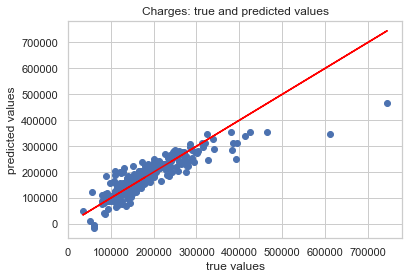

Mean absolute error of the prediction is: 25964.899373831136
Mean squared error of the prediction is: 1573437538.2927485
Root mean squared error of the prediction is: 39666.57961423884
Mean absolute percentage error of the prediction is: 16.09717844469947


In [18]:
from sklearn.metrics import mean_absolute_error
import statsmodels.api as sm
from statsmodels.tools.eval_measures import mse, rmse

# Add constant to the model
X_test = sm.add_constant(X_test)

# making predictions here
y_preds = results.predict(X_test)

plt.scatter(y_test, y_preds)
plt.plot(y_test, y_test, color="red")
plt.xlabel("true values")
plt.ylabel("predicted values")
plt.title("Charges: true and predicted values")
plt.show()

print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds) / y_test)) * 100))



## Evaluate model on test set.

In [24]:
# Add constant to the model
X_test = sm.add_constant(X_test)

# We fit an OLS model using statsmodels
results = sm.OLS(y_test, X_test).fit()

# Print the summary results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              saleprice   R-squared:                       0.787
Model:                            OLS   Adj. R-squared:                  0.783
Method:                 Least Squares   F-statistic:                     211.3
Date:                Sat, 17 Aug 2019   Prob (F-statistic):           8.55e-94
Time:                        15:36:19   Log-Likelihood:                -3492.2
No. Observations:                 292   AIC:                             6996.
Df Residuals:                     286   BIC:                             7018.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -1.014e+05   9974.287    -10.163      

## The goodness of fit of test model using F-test, R-squared, adjusted R-squared, AIC and BIC.

    F-test: 731.8
    r2: 0.759
    adj r2: 0.758
    AIC: 2.800e+04
    BIC: 2.803e+04

# Test for overfitting and regularization

#### Lasso regression model

In [20]:
from sklearn.linear_model import Lasso

lassoregr = Lasso() 
lassoregr.fit(X_train, y_train)

# We are making predictions here
y_preds_train = lassoregr.predict(X_train)
y_preds_test = lassoregr.predict(X_test)

print("R-squared of the model on the training set is: {}".format(lassoregr.score(X_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model on the test set is: {}".format(lassoregr.score(X_test, y_test)))
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds_test)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds_test)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds_test) / y_test)) * 100))


R-squared of the model on the training set is: 0.7589588829327486
-----Test set statistics-----
R-squared of the model on the test set is: 0.7656403852951144
Mean absolute error of the prediction is: 25964.44279998342
Mean squared error of the prediction is: 1573421101.2142653
Root mean squared error of the prediction is: 39666.372423178116
Mean absolute percentage error of the prediction is: 16.096837487839178


# Extra-dataset facts to consider

The dataset here includes homes sold bewtween the years of 2006 and 2010.

There was a housing market crash the peaked (crashed and burned) in December 2008.

Let's look a little into the dataset minus homes sold in 2009 and see if we can better predict without.

In [40]:
df2 = df[df['yrsold'] != 2009]

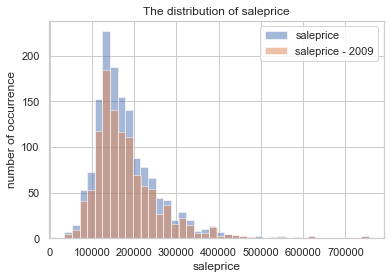

In [50]:
plt.hist(df.saleprice, alpha=0.5, bins=40)
plt.hist(df2.saleprice, alpha=0.5, bins=40)
plt.title("The distribution of saleprice")
plt.legend(["saleprice", "saleprice - 2009"])
plt.xlabel("saleprice")
plt.ylabel("number of occurrence")
plt.show()

In [51]:
X7 = df2[['overallqual', 'grlivarea', 'garagecars', 'garagearea', 'totalbsmtsf']]
Y7 = df2.saleprice

In [52]:
X7 = sm.add_constant(X7)

results = sm.OLS(Y7, X7).fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              saleprice   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     672.3
Date:                Sat, 17 Aug 2019   Prob (F-statistic):               0.00
Time:                        16:07:17   Log-Likelihood:                -13466.
No. Observations:                1122   AIC:                         2.694e+04
Df Residuals:                    1116   BIC:                         2.697e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -9.682e+04   5513.620    -17.560      

## The new goodness of fit of model using F-test, R-squared, adjusted R-squared, AIC and BIC.
    F-test: 672.3
    r2: 0.751
    adj r2: 0.750
    AIC: 2.694e+04
    BIC: 2.697e+04

## Making predicitions

In [53]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X7, Y7, test_size = 0.2, random_state = 465)

print("The number of observations in training set is {}".format(X_train2.shape[0]))
print("The number of observations in test set is {}".format(X_test2.shape[0]))

The number of observations in training set is 897
The number of observations in test set is 225


## Estimate your model from the previous checkpoint in the train set. Assess the goodness of fit of your model.

In [54]:
# Add constant to the model.
X_train2 = sm.add_constant(X_train2)

# Fit an OLS model using statsmodels
results = sm.OLS(y_train2, X_train2).fit()

# Print the summary results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              saleprice   R-squared:                       0.739
Model:                            OLS   Adj. R-squared:                  0.738
Method:                 Least Squares   F-statistic:                     505.0
Date:                Sat, 17 Aug 2019   Prob (F-statistic):          4.38e-257
Time:                        16:10:44   Log-Likelihood:                -10762.
No. Observations:                 897   AIC:                         2.154e+04
Df Residuals:                     891   BIC:                         2.157e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -9.035e+04   6137.106    -14.722      

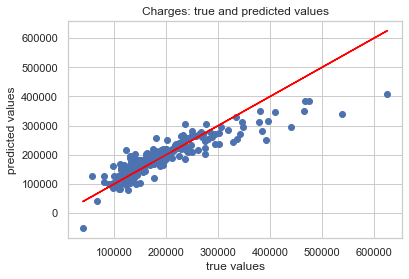

Mean absolute error of the prediction is: 27306.588935193973
Mean squared error of the prediction is: 1640222087.8746576
Root mean squared error of the prediction is: 40499.65540439397
Mean absolute percentage error of the prediction is: 15.405722591261128


In [55]:
# Add constant to the model
X_test2 = sm.add_constant(X_test2)

# making predictions here
y_preds2 = results.predict(X_test2)

plt.scatter(y_test2, y_preds2)
plt.plot(y_test2, y_test2, color="red")
plt.xlabel("true values")
plt.ylabel("predicted values")
plt.title("Charges: true and predicted values")
plt.show()

print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test2, y_preds2)))
print("Mean squared error of the prediction is: {}".format(mse(y_test2, y_preds2)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test2, y_preds2)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test2 - y_preds2) / y_test2)) * 100))

## Evaluate model on test set.

In [56]:
# Add constant to the model
X_test2 = sm.add_constant(X_test2)

# We fit an OLS model using statsmodels
results = sm.OLS(y_test2, X_test2).fit()

# Print the summary results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              saleprice   R-squared:                       0.809
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     185.9
Date:                Sat, 17 Aug 2019   Prob (F-statistic):           1.00e-76
Time:                        16:12:44   Log-Likelihood:                -2688.6
No. Observations:                 225   AIC:                             5389.
Df Residuals:                     219   BIC:                             5410.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        -1.22e+05   1.21e+04    -10.122      

## The goodness of fit of test model using F-test, R-squared, adjusted R-squared, AIC and BIC.
    F-test: 185.9
    r2: 0.809
    adj r2:  0.805
    AIC: 5389.
    BIC: 5410.

## It seems that taking the data from the homes sold in 2009 tightens up the models ability to predict!